<a href="https://colab.research.google.com/github/williamvalenciaK/SQLServerPIT/blob/main/Clases/Sesi%C3%B3n_4_Vistas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

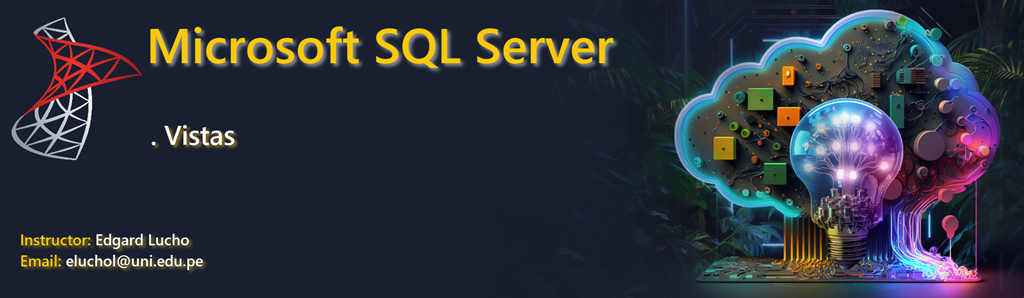

<table width='99%'>
<tr>
<td bgcolor='#52008E'>

# **<font color="#FFFFFF"> ◉ VISTAS</font>**

</td>
</tr>
</table>

Las vistas en SQL Server son objetos de base de datos que representan el resultado de una consulta almacenada.

En esencia, una vista es una tabla virtual que se crea a partir de una consulta SQL.



```
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sys.views
	WHERE name = 'v_categoria'
)
DROP VIEW v_categoria
GO
CREATE VIEW v_categoria
AS
SELECT CategoryID, CategoryName, Description
FROM Categories
GO
SELECT * FROM v_categoria
GO
```





```
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sys.views
	WHERE name = 'v_categoria'
)
DROP VIEW v_categoria
GO
CREATE VIEW v_categoria
(
	ID, Categoría, Descripción
)
AS
SELECT CategoryID, CategoryName, Description
FROM Categories
GO
SELECT * FROM v_categoria
GO
```



<table width='99%'>
<tr>
<td bgcolor='#BB2125'>

### **<font color="#FFFFFF"> ◉ VISTAS ENCRIPTADAS </font>**

</td>
</tr>
</table>



```
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sys.views
	WHERE name = 'v_categoria'
)
DROP VIEW v_categoria
GO
CREATE VIEW v_categoria
(
	ID, Categoría, Descripción
)
WITH ENCRYPTION
AS
SELECT CategoryID, CategoryName, Description
FROM Categories
GO
SELECT * FROM v_categoria
GO
```





```
USE Northwind
GO
SP_HELPTEXT 'v_categoria'
GO
```





```
sp_depends  'v_categoria'
```



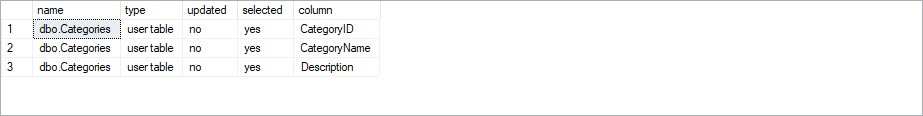



```
SET SHOWPLAN_ALL ON
GO
SELECT * FROM v_categoria
GO
SET SHOWPLAN_ALL OFF
GO
```



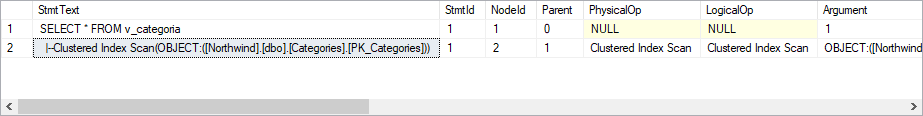

<table width='99%'>
<tr>
<td bgcolor='#BB2125'>

### **<font color="#FFFFFF"> ◉ ALTER: PARA MODIFICAR LAS VISTAS</font>**

</td>
</tr>
</table>



```
ALTER VIEW v_categoria
(
	ID, Categoría, Descripción
)
AS
SELECT CategoryID, CategoryName, Description
FROM Categories
GO
SELECT * FROM v_categoria
GO
```



<table width='99%'>
<tr>
<td bgcolor='#BB2125'>

### **<font color="#FFFFFF"> ◉ EN QUE CASOS USAR LAS VISTAS</font>**

</td>
</tr>
</table>

>* **Simplificar consultas complejas**: Cuando una consulta es demasiado compleja o involucra múltiples tablas, se puede crear una vista que encapsule esa lógica. Esto facilita el acceso a los datos y permite a los usuarios finales consultar los datos sin tener que comprender la complejidad de la consulta subyacente.
>* **Proporcionar seguridad de datos**: Las vistas se pueden utilizar para controlar el acceso a los datos, permitiendo a los usuarios ver solo la información que se les ha autorizado a ver. Esto ayuda a mantener la privacidad y la integridad de los datos.
>* **Mejorar el rendimiento**: Algunas vistas pueden mejorar el rendimiento de las consultas al precalcular y almacenar resultados. Esto puede ser especialmente útil cuando se accede con frecuencia a datos complejos o cuando se realizan consultas agregadas.
>* **Abstraer la complejidad de la base de datos**: Las vistas pueden ocultar la complejidad de la estructura de la base de datos, proporcionando a los usuarios finales una vista simplificada y más fácil de entender de los datos.
>* **Crear lógica de negocio reutilizable**: Las vistas se pueden utilizar para encapsular la lógica de negocio, lo que permite a los desarrolladores y usuarios finales reutilizar ese código en múltiples consultas.
>* **Admitir escenarios de migración**: Cuando se migra una aplicación a una nueva base de datos, las vistas pueden ayudar a mantener la compatibilidad con las consultas existentes, lo que facilita la transición.
>* **Admitir informes y análisis**: Las vistas a menudo se utilizan como la base para informes y análisis, ya que proporcionan una vista consolidada y coherente de los datos.

<table width='99%'>
<tr>
<td bgcolor='#BB2125'>

### **<font color="#FFFFFF"> ◉ REPASO GENERAL</font>**

</td>
</tr>
</table>

1.-	Mostrar de la tabla Orders, todos los pedidos cuya diferencia entre la fecha de despacho y la fecha de la orden del pedido, sean mayores a 4 semanas.
a.	Mostrar las siguientes columnas: OrderId, CustomerId, OrderDate, ShippedDate, diferencia en días, diferencia en semanas y diferencia en meses entre ambas fechas.




```
USE Northwind
GO
SELECT
	OrderId,
	CustomerId,
	OrderDate,
	ShippedDate,
	DATEDIFF(DAY, OrderDate, ShippedDate) AS Días,
	DATEDIFF(DAY, OrderDate, ShippedDate)/7 AS Semanas,
	DATEDIFF(WEEK, OrderDate, ShippedDate) AS Semanas,
	DATEDIFF(DAY, OrderDate, ShippedDate)/30 AS [Mes - 30],
	DATEDIFF(MONTH, OrderDate, ShippedDate) AS [Mes - MONTH]
FROM Orders
WHERE DATEDIFF(DAY, OrderDate, ShippedDate)/7 > 4
GO
```





```
2.-	La empresa tiene como política otorgar a los jefes una comisión del 0.5% sobre la venta de sus subordinados.

Calcule la comisión mensual que le ha correspondido a cada jefe por cada año (basándose en la fecha de la orden) según las ventas que figuran en la base de datos.

Muestre el código del jefe, su apellido, el año y mes de cálculo, el monto acumulado de venta de sus subordinados, y la comisión obtenida.
```



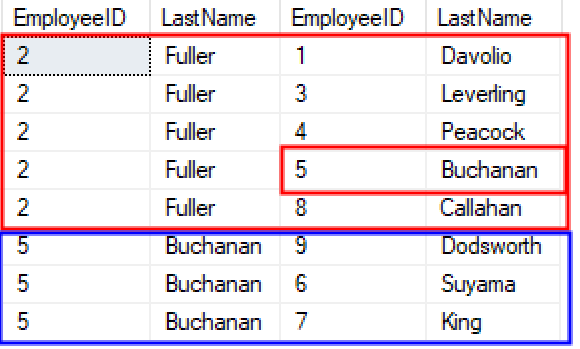

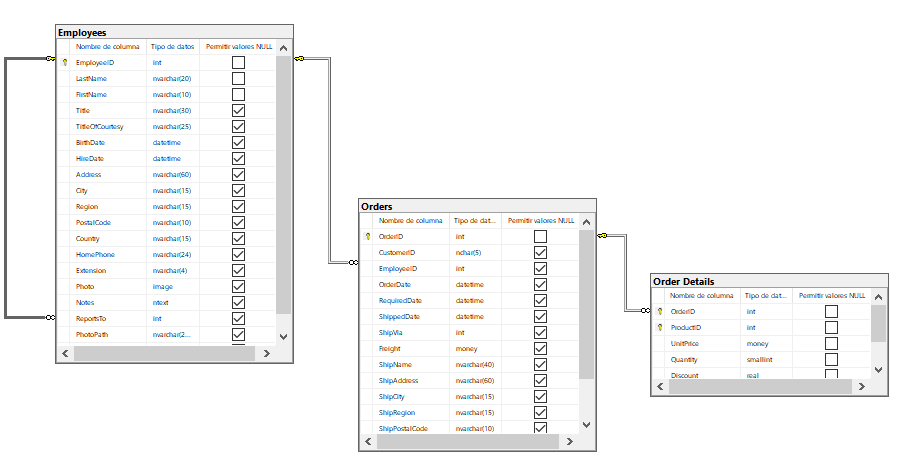



```
USE Northwind
GO
SELECT
	j.EmployeeID AS Código,
	j.LastName AS Apellido,
	YEAR(o.OrderDate) AS Año,
	MONTH(o.OrderDate) AS Mes,
	CONVERT(DECIMAL(19,2),SUM(od.Quantity*od.UnitPrice*(1-od.Discount))) AS 'Monto de las ventas',
	CONVERT(DECIMAL(19,2),SUM(od.Quantity*od.UnitPrice*(1-od.Discount))*0.5/100) AS 'Comisión'
FROM Employees j
INNER JOIN Employees e
ON j.EmployeeID = e.ReportsTo
INNER JOIN Orders o
ON o.EmployeeID=e.EmployeeID
INNER JOIN [Order Details] od
ON o.OrderID=od.OrderID
GROUP BY
	j.EmployeeID, j.LastName,
	YEAR(o.OrderDate),
	MONTH(o.OrderDate)
ORDER BY j.EmployeeID, 3, 4
```





```
Código	Apellido	Año	Mes	Monto de las ventas	Comisión
2	Fuller	1996	7	19762.57	98.81
2	Fuller	1996	8	20651.76	103.26
2	Fuller	1996	9	18240.40	91.20
2	Fuller	1996	10	23010.43	115.05
2	Fuller	1996	11	29187.92	145.94
2	Fuller	1996	12	33704.55	168.52
2	Fuller	1997	1	44634.05	223.17
2	Fuller	1997	2	31684.39	158.42
2	Fuller	1997	3	29169.94	145.85
2	Fuller	1997	4	24769.04	123.85
2	Fuller	1997	5	42983.51	214.92
2	Fuller	1997	6	20451.29	102.26
2	Fuller	1997	7	36167.08	180.84
2	Fuller	1997	8	35501.14	177.51
2	Fuller	1997	9	23712.37	118.56
2	Fuller	1997	10	49379.03	246.90
2	Fuller	1997	11	24636.50	123.18
2	Fuller	1997	12	53644.77	268.22
2	Fuller	1998	1	76032.85	380.16
2	Fuller	1998	2	48813.87	244.07
2	Fuller	1998	3	72616.19	363.08
2	Fuller	1998	4	49469.39	247.35
2	Fuller	1998	5	15242.82	76.21
5	Buchanan	1996	7	6923.32	34.62
5	Buchanan	1996	8	3019.52	15.10
5	Buchanan	1996	9	5190.20	25.95
5	Buchanan	1996	10	9341.30	46.71
5	Buchanan	1996	11	11797.54	58.99
5	Buchanan	1996	12	5497.40	27.49
5	Buchanan	1997	1	13564.14	67.82
5	Buchanan	1997	2	5215.24	26.08
5	Buchanan	1997	3	6532.38	32.66
5	Buchanan	1997	4	15145.26	75.73
5	Buchanan	1997	5	6424.46	32.12
5	Buchanan	1997	6	9029.31	45.15
5	Buchanan	1997	7	6888.78	34.44
5	Buchanan	1997	8	11729.03	58.65
5	Buchanan	1997	9	22630.22	113.15
5	Buchanan	1997	10	7205.40	36.03
5	Buchanan	1997	11	15330.31	76.65
5	Buchanan	1997	12	10213.42	51.07
5	Buchanan	1998	1	13838.15	69.19
5	Buchanan	1998	2	27473.87	137.37
5	Buchanan	1998	3	18300.33	91.50
5	Buchanan	1998	4	43339.01	216.70
5	Buchanan	1998	5	1160.83	5.80
```

